# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | marudi
City not found. Skipping...
Processing Record 4 of Set 1 | axum
Processing Record 5 of Set 1 | rio guayabal de yateras
Processing Record 6 of Set 1 | arkhangel'sk
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | bathsheba
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | mogoytuy
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | lavrio
Processing Reco

Processing Record 41 of Set 4 | muisne
Processing Record 42 of Set 4 | alaghsas
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | antsohimbondrona
City not found. Skipping...
Processing Record 45 of Set 4 | margaret river
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | nguigmi
Processing Record 48 of Set 4 | tomatlan
Processing Record 49 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 0 of Set 5 | nar'yan-mar
Processing Record 1 of Set 5 | ust'-ilimsk
Processing Record 2 of Set 5 | little cayman
City not found. Skipping...
Processing Record 3 of Set 5 | hawaiian paradise park
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | belyy yar
Processing Record 6 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 5 | dien bien phu
Processing Record 8 of Set 5 | sovetskoye
Processing Record 9 of Set 5 | savave village
City not found. Skipping...
Processing Record 10 of Set 5 | kyre

Processing Record 29 of Set 8 | kataragama
City not found. Skipping...
Processing Record 30 of Set 8 | dwarka
Processing Record 31 of Set 8 | sharkan
Processing Record 32 of Set 8 | al jawf
Processing Record 33 of Set 8 | bengkulu
Processing Record 34 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 35 of Set 8 | villa hidalgo
Processing Record 36 of Set 8 | koster
Processing Record 37 of Set 8 | katsuren-haebaru
Processing Record 38 of Set 8 | kavaratti
Processing Record 39 of Set 8 | bikenibeu village
Processing Record 40 of Set 8 | san pedro
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | benguela
Processing Record 43 of Set 8 | ghadamis
Processing Record 44 of Set 8 | ha'il
Processing Record 45 of Set 8 | chadron
Processing Record 46 of Set 8 | broome
Processing Record 47 of Set 8 | la punta
Processing Record 48 of Set 8 | ardakan
Processing Record 49 of Set 8 | arzgir
Processing Record 0 of Set 9 | kuching
Processing Record 1 of Set

Processing Record 16 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 17 of Set 12 | el abiodh sidi cheikh
Processing Record 18 of Set 12 | hirara
Processing Record 19 of Set 12 | n'djamena
Processing Record 20 of Set 12 | nikolayevsk-on-amure
Processing Record 21 of Set 12 | seosan
Processing Record 22 of Set 12 | dawson creek
Processing Record 23 of Set 12 | marina di ardea-tor san lorenzo
City not found. Skipping...
Processing Record 24 of Set 12 | ulan bator
Processing Record 25 of Set 12 | zeribet el oued
Processing Record 26 of Set 12 | bharatpur
Processing Record 27 of Set 12 | homer
Processing Record 28 of Set 12 | mezhdurechensk
Processing Record 29 of Set 12 | amursk
Processing Record 30 of Set 12 | santa ana
Processing Record 31 of Set 12 | shahrud
Processing Record 32 of Set 12 | al hazm
Processing Record 33 of Set 12 | al qusayr
Processing Record 34 of Set 12 | mulanje
Processing Record 35 of Set 12 | cangucu
Processing Record 36 of Set 12 | vicuna
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.19,98,100,3.12,GS,1686167174
1,punta arenas,-53.1500,-70.9167,4.06,75,20,6.69,CL,1686167174
2,axum,14.1245,38.7244,17.59,69,100,3.10,ET,1686167174
3,rio guayabal de yateras,20.3667,-75.0167,28.82,64,58,2.39,CU,1686167174
4,arkhangel'sk,64.5401,40.5433,2.69,77,4,1.52,RU,1686167091


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.19,98,100,3.12,GS,1686167174
1,punta arenas,-53.1500,-70.9167,4.06,75,20,6.69,CL,1686167174
2,axum,14.1245,38.7244,17.59,69,100,3.10,ET,1686167174
3,rio guayabal de yateras,20.3667,-75.0167,28.82,64,58,2.39,CU,1686167174
4,arkhangel'sk,64.5401,40.5433,2.69,77,4,1.52,RU,1686167091


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

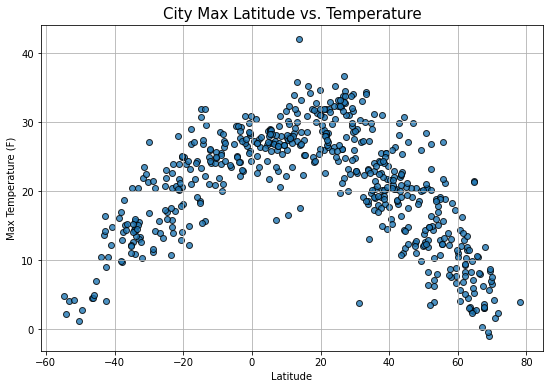

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature", fontsize=15)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

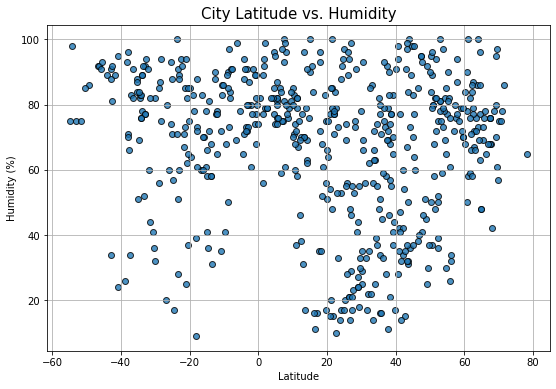

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

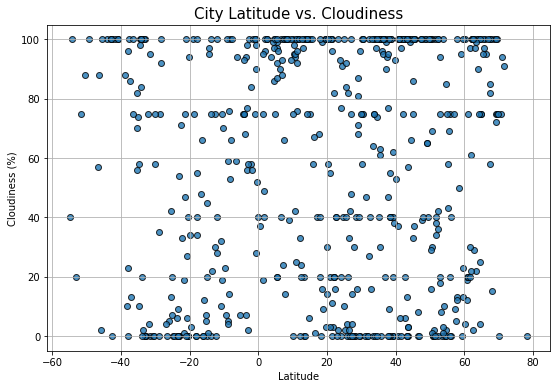

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

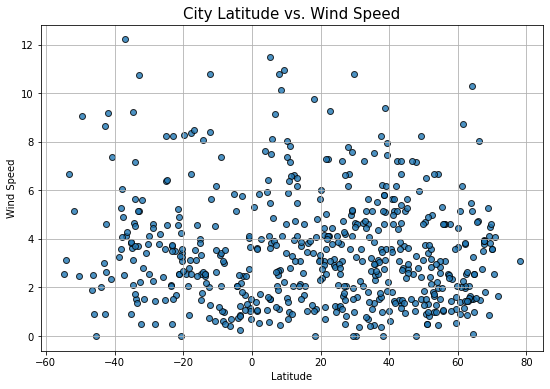

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            marker="o",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=15)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,axum,14.1245,38.7244,17.59,69,100,3.10,ET,1686167174
3,rio guayabal de yateras,20.3667,-75.0167,28.82,64,58,2.39,CU,1686167174
4,arkhangel'sk,64.5401,40.5433,2.69,77,4,1.52,RU,1686167091
7,bathsheba,13.2167,-59.5167,31.34,70,20,6.17,BB,1686167175
8,ilulissat,69.2167,-51.1000,-0.99,80,75,4.12,GL,1686167175


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.19,98,100,3.12,GS,1686167174
1,punta arenas,-53.1500,-70.9167,4.06,75,20,6.69,CL,1686167174
5,edinburgh of the seven seas,-37.0676,-12.3116,15.11,83,13,12.22,SH,1686167174
6,puerto natales,-51.7236,-72.4875,4.25,75,75,5.14,CL,1686167174
10,puerto ayora,-0.7393,-90.3518,29.98,89,98,4.02,EC,1686167175


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7852645305815822


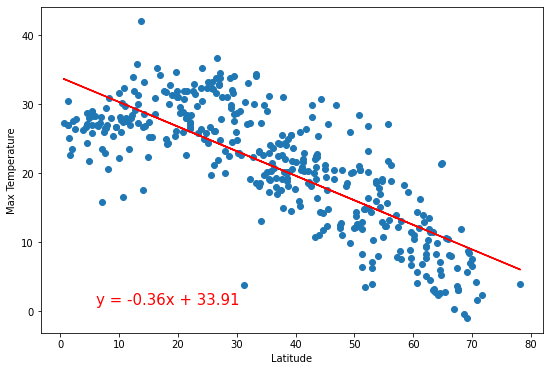

In [14]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.842073843596426


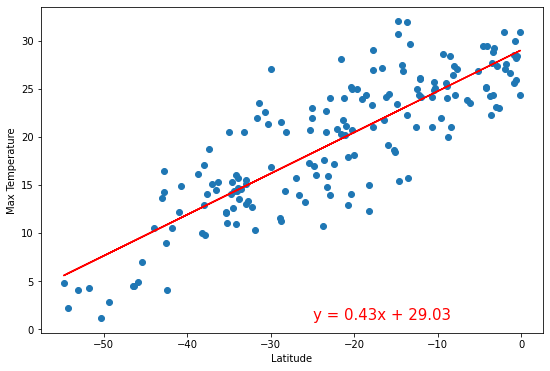

In [15]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere there is a negative correlation between latitude and maximum temperature, while in the Southern hemisphere there is a positive correlation. From this we can see that if a city is located away of the equator the temperature decreases, while if it is closer to the equator it increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.018078716777789515


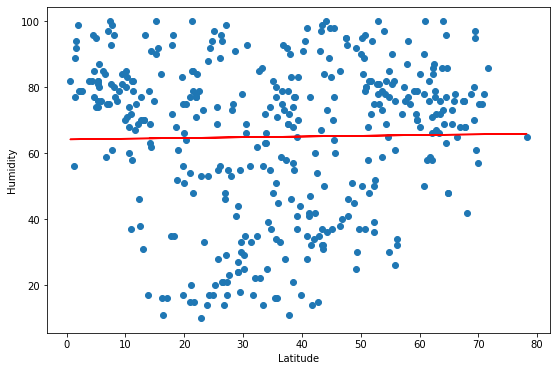

In [16]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,5), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.031820733276064106


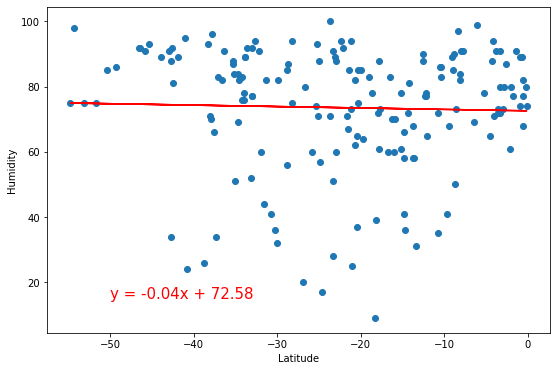

In [17]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** From the r-value and the graphs we can deduct that there is no correlation between the humidity levels and the location of the city from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0747018412782814


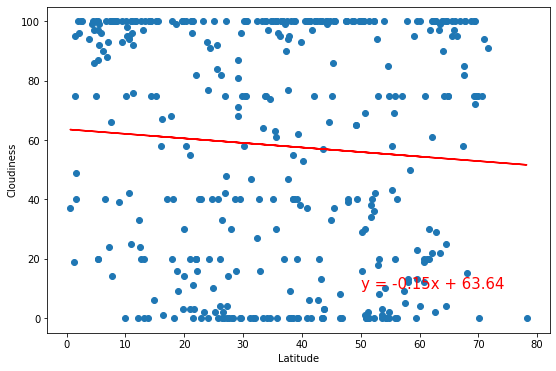

In [18]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,10), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.05748025565440918


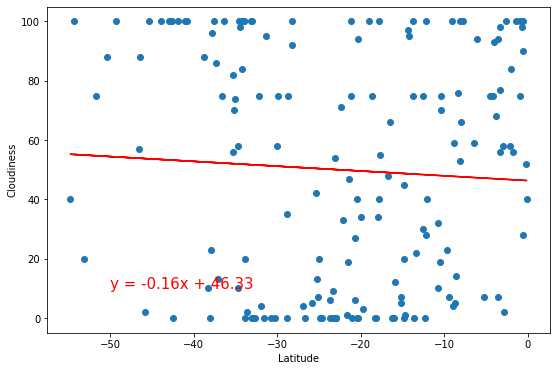

In [19]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** With a small r-value and the graphs we can see that there is no correlation between the cloudiness and the position of the city related to the equator. The cloudiness points are spread across the graph.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14517705163805297


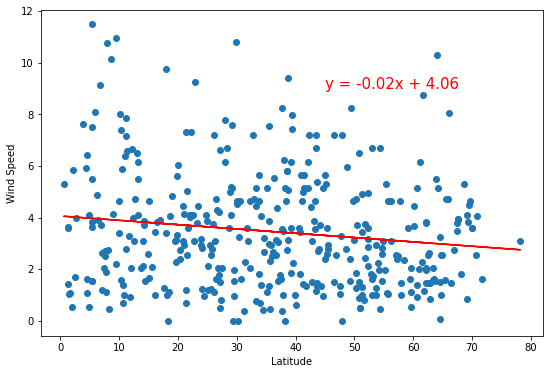

In [20]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,9), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.24470196196834693


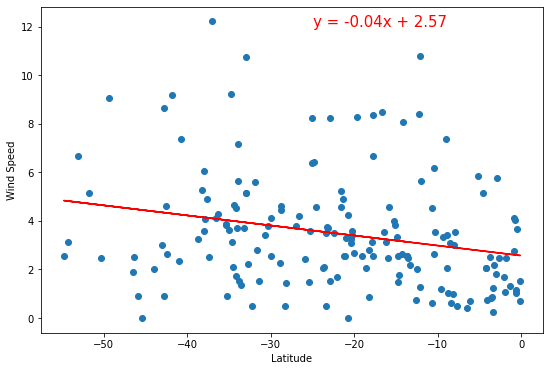

In [21]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The correlation between the wind speed and a latitude on both the Northern and Southern Hemispheres is low. When the city moves away from the equator the wind speed lighlty increases.